# Домашная работа 3. Визуальный анализ.

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём репозитории.

#### Полезная литература

- [Галерея графиков Matplotlib](https://matplotlib.org/gallery/index.html)
- [Галерея графиков Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Открытый курс машинного обучения. Тема 2: Визуализация данных c Python](https://habr.com/company/ods/blog/323210/)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
colab = False # если работаете на своём компьютере, поставьте False
if colab:
    from google.colab import drive
    drive.mount('/content/drive')

## Визуальный анализ данных

В этом задании вам предлагается провести визуальный анализ датасета результатов экзаменов студентов  https://www.kaggle.com/spscientist/students-performance-in-exams. 

In [4]:
if colab:
    df = pd.read_csv('/content/drive/My Drive/Data/StudentsPerformance.csv')
else:
    df = pd.read_csv("../data/StudentsPerformance.csv")

df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


## Задания
#### 1. Постройте 3 графика, показывающих распределение результатов экзаменов (каждый график на предмет).


Графики должны быть в одном ряду и у них должен быть общий заголовок "Результаты экзаменов".

Для результатов каждого экзамена посчитайте медианные значения.


Медианна math score = 66.0
Медианна reading score = 70.0
Медианна writing score = 69.0


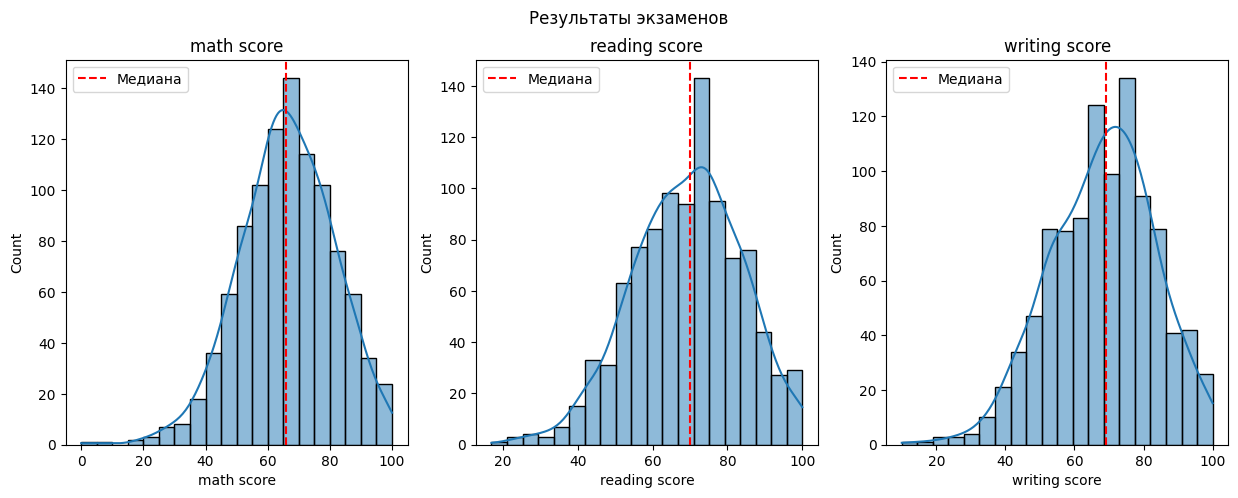

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle("Результаты экзаменов")

for ax, subject in zip(axes, ["math score", "reading score", "writing score"]):
    print(f"Медианна {subject} = {df[subject].median()}")
    sns.histplot(df[subject], bins=20, kde=True, ax=ax)
    ax.axvline(df[subject].median(), color='red', linestyle='dashed', label='Медиана')
    ax.set_title(subject)
    ax.legend()

plt.show()

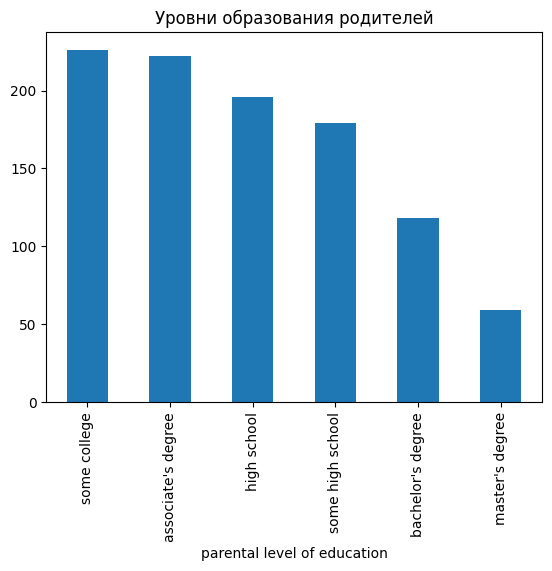

In [7]:
education_counts = df['parental level of education'].value_counts()
education_counts.plot(kind='bar', title='Уровни образования родителей')
plt.show() 

#### 2. Образование родителей
Какие уровни образование есть в столбце *'parental level of education'* и сколько строк в датафрейме соответствует каждому уровню? 

Постройте график и ответьте на вопрос ниже

Отличаются ли баллы по математике у детей с разным образованием родителей?
Постройте график, где по оси Х находятся уровни образования родителей, а по У - баллы по математике.


Вывод: Баллы отличаются

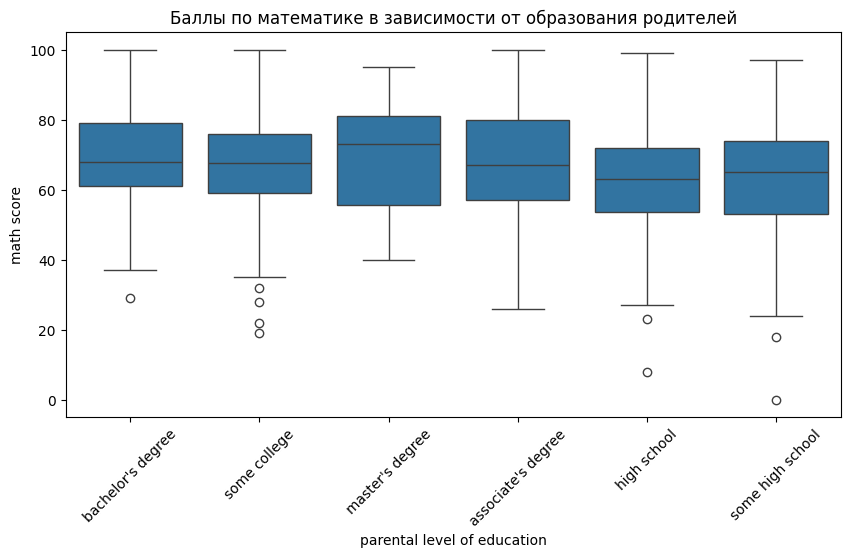

In [8]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='parental level of education', y='math score', data=df)
plt.xticks(rotation=45)
plt.title("Баллы по математике в зависимости от образования родителей")
plt.show()

#### 3. Выведите число студенток, набравших больше 90 баллов по всем предметам.


In [12]:
good_students = df[(df['gender'] == 'female') & (df['math score'] > 90) & (df['reading score'] > 90) & (df['writing score'] > 90)]
print(len(good_students))

17


#### 4. Сравните баллы у студентов разных полов. Используя agg() выведите минимальное, максимальное и медианное значение
 

In [13]:
stats = df.groupby("gender")[['math score', 'reading score', 'writing score']].agg(['min', 'max', 'median'])
display(stats)

math score             reading score             writing score       \
              min  max median           min  max median           min  max   
gender                                                                       
female          0  100   65.0            17  100   73.0            10  100   
male           27  100   69.0            23  100   66.0            15  100   

               
       median  
gender         
female   74.0  
male     64.0

#### 5. Выясните, влияет ли обед и подготовка к тесту на средний балл студентов разного пола 
###### (подсказка: используете agg())

In [14]:
lunch_prep_stats = df.groupby(['gender', 'lunch', 'test preparation course'])[['math score', 'reading score', 'writing score']].agg(['mean'])
display(lunch_prep_stats)

math score reading score  \
                                                  mean          mean   
gender lunch        test preparation course                            
female free/reduced completed                60.785714     73.428571   
                    none                     52.890756     63.831933   
       standard     completed                71.131579     79.798246   
                    none                     66.530233     73.386047   
male   free/reduced completed                65.639344     65.786885   
                    none                     60.609524     59.076190   
       standard     completed                75.955752     72.601770   
                    none                     69.832512     64.719212   

                                            writing score  
                                                     mean  
gender lunch        test preparation course                
female free/reduced completed                   74.371429  
                    none                        61.781513  
       standard     completed                   81.508772  
                    none                        72.967442  
male   free/reduced completed                   65.737705  
                    none                        55.285714  
       standard     completed                   71.982301  
                    none                        61.906404

#### 6. Постройте график, показывающий зависимость уровня образования родителей от их расы 

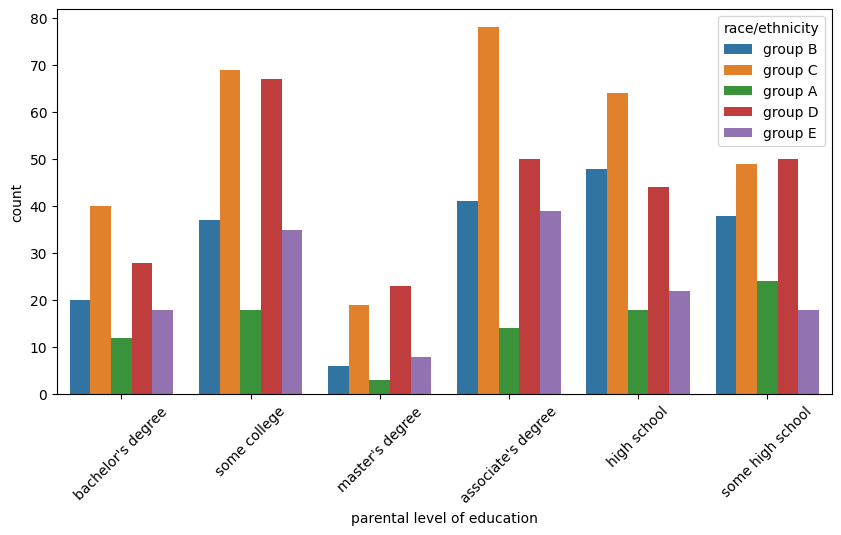

In [17]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='parental level of education', hue='race/ethnicity')
plt.xticks(rotation=45)
plt.show()

#### 7. Постройте график, показывающий зависимость прохождения подготовительного теста от уровня образования родителей.


Кто чаще ходит на курсы: дети, родители которых закончили только старшую школу, или дети, чьи родители получили степень бакалавра\магистра?

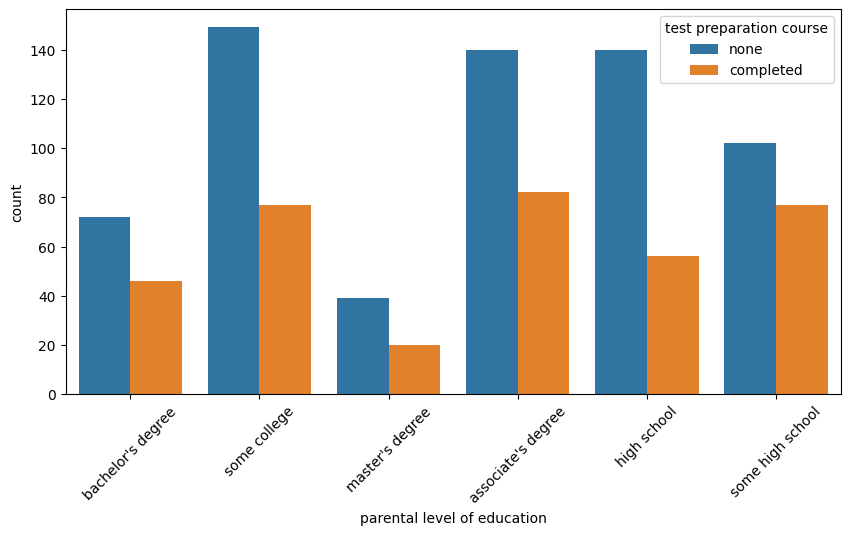

In [18]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='parental level of education', hue='test preparation course')
plt.xticks(rotation=45)
plt.show()

#### 8. Постройте plot.pie, показывающий, сколько людей сдали\не сдали экзамен по математике.

Сдавшим считается человек, набравший 40 баллов.

###### Подсказка: создайте столбец в датафрейме, который содержит результат сдачи (сдал или не сдал)

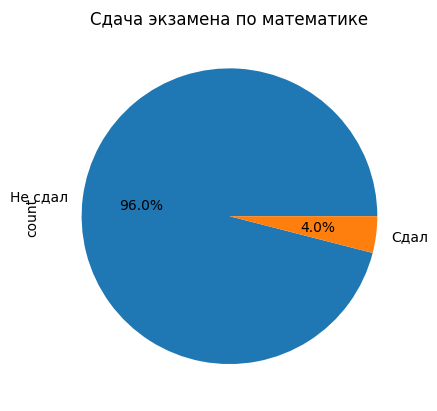

In [19]:
df['passed_math'] = df['math score'] >= 40
df['passed_math'].value_counts().plot.pie(autopct='%1.1f%%', labels=['Не сдал', 'Сдал'], title='Сдача экзамена по математике')
plt.show()

#### 9. Постройте plot.pie, показывающий распределение студентов по оценкам

Оценки студентов выставляются по шкале:<br>
0  - 40 marks : grade E<br>
41 - 60 marks : grade D<br>
60 - 70 marks : grade C<br>
70 - 80 marks : grade B<br>
80 - 90 marks : grade A<br>
90 - 100 marks : grade O<br>

Для этого посчитайте сумму результатов за 3 экзамена и найдите среднее. Оценка выставляется по среднему значению. Если студент не сдал математику(даже если средний балл выше 40), он получает Е

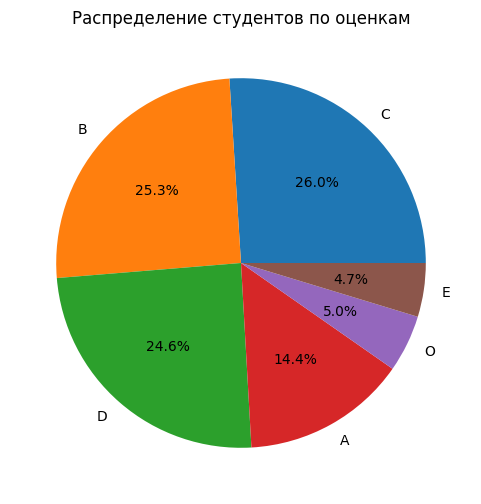

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Средний балл
df['avg_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

# Условия для выставления оценок
conditions = [
    df['math score'] < 40,
    df['avg_score'] <= 40,
    df['avg_score'] <= 60,
    df['avg_score'] <= 70,
    df['avg_score'] <= 80,
    df['avg_score'] <= 90
]

grades = ['E', 'E', 'D', 'C', 'B', 'A']
default_grade = 'O'

df['grade'] = np.select(conditions, grades, default=default_grade)

df['grade'].value_counts().plot.pie(
    autopct='%1.1f%%',
    title='Распределение студентов по оценкам',
    ylabel='', 
    figsize=(6, 6)
)
plt.show()


#### 10. Постройте countplot, показывающий зависимость между итоговой оценкой студентов и его полом. Студенты какого пола получили больше оценок О, А, В

ответ: женщины

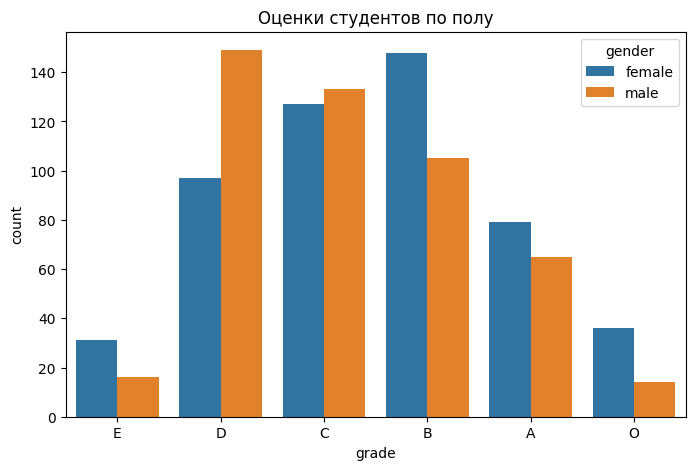

In [21]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='grade', hue='gender', order=['E', 'D', 'C', 'B', 'A', 'O'])
plt.title("Оценки студентов по полу")
plt.show()